[View in Colaboratory](https://colab.research.google.com/github/juzkev/A-Bridged/blob/master/LM_Classification.ipynb)

# Setup Libs

In [3]:
# Time
import time
start_t = time.time()

# Google Drive
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyPDF2
# !pip install pypdf2
# import PyPDF2

#textract
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libpulse-dev
!pip install textract
import textract

# DS essentials
import pandas as pd
import numpy as np

# NLP
import re



##### Additional Setup for Google Colab Fast AI & PyTorch #####

## Install Pytorch and torchvision
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl torchvision 
  
# ## Install Fastai (Github version)
!git clone https://github.com/fastai/fastai.git
!pip install -r fastai/requirements.txt
!pip install ./fastai

#Install Fastai (pip)
# !pip install fastai

## Install libSM
### The import of fastai is will throw an error that this library is missing. So, Installing the same.
!apt update && apt install -y libsm6 libxext6


# Install Spacy required for fastai.text
!pip install -U spacy
!python -m spacy download en

print(f'Set up Process took {time.time() - start_t} seconds')

textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
textract 1.6.1 has requirement six==1.10.0, but you'll have six 1.11.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libxslt1-dev is already the newest version (1.1.29-2.1ubuntu1).
python-dev is already the newest version (2.7.14-2ubuntu1).
antiword is already the newest version (0.37-11).
ffmpeg is already the newest version (7:3.3.4-2).
flac is already the newest version (1.3.2-1).
lame is already the newest version (3.99.5+repack1-9build1).
libmad0 is already the newest version (0.15.1b-8ubuntu1).
libsox-fmt-mp3 is already the newest version (14.4.1-5build1).
pstotext is already the newest version (1.9-6).
sox is already the newest version (14.4.1-5build1).
swig

  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
textract 1.6.1 has requirement six==1.10.0, but you'll have six 1.11.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: six 1.10.0
    Uninstalling six-1.10.0:
      Successfully uninstalled six-1.10.0
  Found existing installation: chardet 2.3.0
    Uninstalling chardet-2.3.0:
      Successfully uninstalled chardet-2.3.0
Processing ./fastai


  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-osvd6u_1/wheels/7f/c5/2c/a27fe207aca95898ce43c805d56bc99c9440532d301c42567d
Successfully built fastai
textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
textract 1.6.1 has requirement six==1.10.0, but you'll have six 1.11.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: fastai 0.7.0
    Uninstalling fastai-0.7.0:
      Successfully uninstalled fastai-0.7.0
Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
0% [3 InRelease gpgv 88.7 kB]

Fetched 247 kB in 0s (268 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
6 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.0.11)
Requirement not upgraded as not directly required: pathlib in /usr/local/lib/python3.6/dist-packages (from spacy) (1.0.1)
Requirement not upgraded as not directly required: dill<0.3,>=0.2 in /usr/local/lib/python3.6/dist-packages (from spacy) (0.2.8.2)
Requirement not upgraded as not directly required: preshed<2.0.0,>=1.0.0 in /usr/local/lib/python3.6/dist-packages (from spacy) (1.0.0)
Requirement not upgraded as not directly required: plac<1.0.0,>=

    100% |████████████████████████████████| 37.4MB 47.0MB/s 

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')

Set up Process took 30.55848217010498 seconds


In [2]:
# GPU status
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!nvidia-smi

Sun Jul  1 08:51:39 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P8    25W / 149W |      0MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Export saved files

In [79]:
# EXPORT

filename = 'export1906.tar.gz'

print('Archiving files')
!tar --exclude='./data/aclImdb/models/wt103' -cvzf {filename} ./data/aclImdb ./data/imdb_clas ./data/imdb_lm ./data/df.pkl

!ls -l -h

# Google Drive
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fid = '1oVM1krBOzXbxgDN9hq8UqQjMxrgvLwzB'     # /DS/A-Bridged

f = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": fid}]})
f.SetContentFile(filename)
f.Upload()
print('Created file %s with mimeType %s' % (f['title'], f['mimeType']))

Archiving files
./data/aclImdb/
./data/aclImdb/tmp/
./data/aclImdb/models/
./data/aclImdb/models/lm_last_ft.h5
./data/aclImdb/models/lm5_enc.h5
./data/aclImdb/models/tmp.h5
./data/aclImdb/models/lm5.h5
./data/imdb_clas/
./data/imdb_clas/train.csv
./data/imdb_clas/classes.txt
./data/imdb_clas/test.csv
./data/imdb_lm/
./data/imdb_lm/tmp/
./data/imdb_lm/tmp/tok_trn.npy
./data/imdb_lm/tmp/tok_val.npy
./data/imdb_lm/tmp/itos.pkl
./data/imdb_lm/tmp/val_ids.npy
./data/imdb_lm/tmp/trn_ids.npy
./data/df.pkl
total 423M
drwxr-xr-x 10 root root 4.0K Jun 19 13:38 data
drwxr-xr-x  1 root root 4.0K Jun 19 13:22 datalab
-rw-r--r--  1 root root 423M Jun 19 15:16 export1906.tar.gz
drwxr-xr-x  8 root root 4.0K Jun 19 13:25 fastai
-rw-r--r--  1 root root  24K Jun 19 15:04 losses.npy
-rw-r--r--  1 root root  17K Jun 19 15:04 loss_plot.png
textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
textract 1.6.1 has requirement six==1.10.0, but you'll have six 1.11.0

# Import saved files

In [3]:
# Google Drive
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import re

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_list = drive.ListFile(
        {'q': f"'1oVM1krBOzXbxgDN9hq8UqQjMxrgvLwzB' in parents"}).GetList()

for f in file_list:
  if re.match(r'export.*\.tar\.gz', f['title']):
    if f['labels']['trashed'] == False:
      f_ = drive.CreateFile({'id': f['id']})
      f_.GetContentFile(f['title'])
      print('Created file %s with mimeType %s' % (f_['title'], f_['mimeType']))
      print('Extracting files')
      !tar -xvzf {f_['title']}
      
      
# Import all the variables


textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
textract 1.6.1 has requirement six==1.10.0, but you'll have six 1.11.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
Created file export1906.tar.gz with mimeType application/x-tar
Extracting files
./data/aclImdb/
./data/aclImdb/tmp/
./data/aclImdb/models/
./data/aclImdb/models/lm_last_ft.h5
./data/aclImdb/models/lm5_enc.h5
./data/aclImdb/models/tmp.h5
./data/aclImdb/models/lm5.h5
./data/imdb_clas/
./data/imdb_clas/train.csv
./data/imdb_clas/classes.txt
./data/imdb_clas/test.csv
./data/imdb_lm/
./data/imdb_lm/tmp/
./data/imdb_lm/tmp/tok_trn.npy
./data/imdb_lm/tmp/tok_val.npy
./data/imdb_lm/tmp/itos.pkl
./data/imdb_lm/tmp/val_ids.npy
./data/imdb_lm/tmp/trn_ids.npy
./data/df.pkl


# Downloading PDFs from Google Drive

In [4]:
# choose a local (colab) directory to store the data.
start_t = time.time()

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

ids = {'SDG 15 - Life on Land': '16O4EAd9uQomSH5CBy8zvZklCUujk8yzn',
      'SDG 12 - Responsible Consumption and Production': '1h1n9hVcrT73a1sh9cuJDBmW0erBRa_ZS',
      'SDG 10 - Reduced Inequalities': '1SLumvZ4n4BJM3zmXdIUWEplcjx2JGMN-',
      'SDG 08 - Decent Work and Economic Growth': '1jIm9xN6PiGvnGQ9Xu0OSUZHsexuTTTaC',
      'SDG 05 - Gender Equality': '116grOjLbS7j79UPvNEz0jEb3WR-4BVMX'}

def download_files(ids):
  for name, id in ids.items():
    try:
      os.makedirs(os.path.join(local_download_path, name))
    except: pass
    file_list = drive.ListFile(
        {'q': f"'{id}' in parents"}).GetList()

    for f in file_list:
      # 3. Create & download by id.
#       print('title: %s, id: %s' % (f['title'], f['id']))
      fname = os.path.join(local_download_path, name, f['title'])
      print('downloading to {}'.format(fname))
      try:
        f_ = drive.CreateFile({'id': f['id']})
        f_.GetContentFile(fname)
      except:pass
      
download_files(ids)

print(f'Downloading the PDFs took {time.time() - start_t} seconds')

downloading to /content/data/SDG 15 - Life on Land/Reclaiming the City- Waterfront Development in Singapore.pdf
downloading to /content/data/SDG 15 - Life on Land/ANIMAL PROTECTION LAWS OF SINGAPORE AND MALAYSIA.pdf
downloading to /content/data/SDG 15 - Life on Land/SG sustainable future, law governance and management.pdf
downloading to /content/data/SDG 15 - Life on Land/-A FINE CITY IN A GARDEN-ENVIRONMENTAL LAW AND GOVERNANCE IN SINGAPORE.pdf
downloading to /content/data/SDG 15 - Life on Land/Kyoto Protocol.pdf
downloading to /content/data/SDG 15 - Life on Land/Convention on the Law of the  International Watercourses.pdf
downloading to /content/data/SDG 15 - Life on Land/Mekong River.pdf
downloading to /content/data/SDG 15 - Life on Land/Pulp Mill on River Uruguay.pdf
downloading to /content/data/SDG 15 - Life on Land/Mekong Agreement and Procedures.pdf
downloading to /content/data/SDG 15 - Life on Land/UNFCC.pdf
downloading to /content/data/SDG 15 - Life on Land/Env Laws SG.pdf
dow

downloading to /content/data/SDG 12 - Responsible Consumption and Production/Cleveland and Ruth 1997.pdf
downloading to /content/data/SDG 12 - Responsible Consumption and Production/Ayres 1999.pdf
downloading to /content/data/SDG 12 - Responsible Consumption and Production/Supplement to Lecture 3.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/birch-corporatesocialresponsibility-2004.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/The_Dynamics_of_Corporate_Social_Responsibility_INSEAD.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/1251121517Corporate Philanthropy in Asia.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Contextualising CSR in Asia_ Corporate Social Responsibility in A.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Engaging Employees in Community Investment at Pfizer.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Stakeholder Engagement and Sustainable CorporateCommunity Investment

downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Globalization and its effects on youth employment trends in Asia.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Global Production Systems and Decent Work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Decent Work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Marginality_from_Myth_to_Reality.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Rising Informality.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Decent Work Objectives and Activities.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Women’s economic empowerment and inclusive growth.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Measurement of decent work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/ORGANISING AS A CATALYST FOR PROMOTING DECENT WORK.p

# Reading the PDF into DF

In [5]:
# Reading the PDF
df = pd.DataFrame()
succ = 0
fail = 0
pattern = 'SDG (\d{2})'
s_t = time.time()

for foldername in os.listdir(local_download_path):
  if os.path.isdir(os.path.join(local_download_path, foldername)):
    for filename in os.listdir(os.path.join(local_download_path, foldername)):
      try:
        print(os.path.join(local_download_path, foldername, filename))

#         Old PyPDF2 code
#         read_pdf = PyPDF2.PdfFileReader(os.path.join(local_download_path, foldername, filename))
#         t = ''
#         for p in range(0, read_pdf.getNumPages()):
#           page = read_pdf.getPage(p)
#           page_content = page.extractText()
#           t += str(page_content.encode('utf-8'))

        # Textract code
        t = textract.process(os.path.join(local_download_path, foldername, filename))

        df=df.append({'filename': filename, 'SDG': re.search(pattern, foldername).group(1),'fulltext': t}, ignore_index=True)
        succ += 1
      except Exception as e: 
        print(e)
        fail += 1

print(f'''Successfully processed {succ}/{succ+fail} pdfs''')
print(f'Reading PDFs took {time.time()-s_t} seconds')

/content/data/SDG 08 - Decent Work and Economic Growth/Marginality_from_Myth_to_Reality.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Decent Work Objectives and Activities.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/The Place of Social Capital.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Labour_Regulations_and_Labour_Standards_in_India_D.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Global Production Systems and Decent Work.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Rising Informality.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Challenges and Opportunities to Promote Decent Work.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Informalization, Economic Growth and the Challenge.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/ORGANISING AS A CATALYST FOR PROMOTING DECENT WORK.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Women’s economic empowerment and inclusive growth

/content/data/SDG 10 - Reduced Inequalities/Corporate Social Responsibility and Gender Diversity.pdf
/content/data/SDG 10 - Reduced Inequalities/Engaging Employees in Community Investment at Pfizer.pdf
/content/data/SDG 10 - Reduced Inequalities/Stakeholder Engagement and Sustainable CorporateCommunity Investment.pdf
/content/data/SDG 10 - Reduced Inequalities/POTENTIAL AND PROSPECTS FOR PHILANTHROPY IN IMPLEMENTING POST-2015 DEVELOPMENT GOALS.pdf
/content/data/SDG 12 - Responsible Consumption and Production/Gowdy and Messener 1998.pdf
/content/data/SDG 12 - Responsible Consumption and Production/Chapter-8 BCA.pdf
/content/data/SDG 12 - Responsible Consumption and Production/Thermodynamics on MainStreet.pdf
/content/data/SDG 12 - Responsible Consumption and Production/IMPERFECT INFORMATION INLEARNING OF ECONOMICS.pdf
/content/data/SDG 12 - Responsible Consumption and Production/Elias Khalil 2004.pdf
/content/data/SDG 12 - Responsible Consumption and Production/Extension of environmenta

/content/data/SDG 05 - Gender Equality/Comfort Women of South Korea.pdf
/content/data/SDG 05 - Gender Equality/Sexual and Gender-Based Violence.pdf
/content/data/SDG 05 - Gender Equality/Arab Spring_ Women?s Empowerment in Algeria.pdf
/content/data/SDG 05 - Gender Equality/Earning Power of Mothers and Children?s Time Allocation.pdf
/content/data/SDG 05 - Gender Equality/Study of Gender as Social Practice.pdf
/content/data/SDG 05 - Gender Equality/Cross-Gender Casting.pdf
/content/data/SDG 05 - Gender Equality/Diversity in Top Level Management and Firm Performance.pdf
/content/data/SDG 05 - Gender Equality/Gender, Employment, and Work-Family Balance Policies in Singapore.pdf
/content/data/SDG 05 - Gender Equality/Queer_LGBT Nigerian Diasporic Women in the USA.pdf
/content/data/SDG 05 - Gender Equality/Determinants of Female?s Employment Outcomes in Vietnam.pdf
/content/data/SDG 05 - Gender Equality/Indian Feminists in the Legal Reform Process.pdf
/content/data/SDG 05 - Gender Equality/E

In [0]:
df.to_pickle('data/df.pkl')

In [0]:
df = pd.read_pickle('data/df.pkl')

In [8]:
df.head()

,SDG,filename,fulltext
0,08,Marginality_from_Myth_to_Reality.pdf,b'MARGINALITY FROM MYTH TO REALITY\nTHE FAVELA...
1,08,Decent Work Objectives and Activities.pdf,b'IILS\nPrice: 30 Swiss francs\n\nILO\n\nThe v...
2,08,The Place of Social Capital.pdf,"b'See discussions, stats, and author pro\xef\x..."
3,08,Labour_Regulations_and_Labour_Standards_in_Ind...,"b'See discussions, stats, and author pro\xef\x..."
4,08,Global Production Systems and Decent Work.pdf,"b""Global Production Systems and Decent Work\n\..."


In [9]:
# Count of articles by SDG
(df
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,20,20
08,20,20
10,31,31
12,19,19
15,28,28


In [10]:
# Short article lengths, usually not read by the pdf reader correctly
df_short =(df
           .assign(text_len = lambda x: x.fulltext.str.len())
           .query('text_len < 5000'))

# Removing these articles from analysis
df_usable = df[~df.filename.isin(df_short.filename)]

(df_usable
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,20,20
08,20,20
10,29,29
12,15,15
15,24,24


# Start of Fastai Stuff

In [0]:
from fastai.text import *
import html

BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag

PATH=Path('data/aclImdb/')

CLAS_PATH=Path('data/imdb_clas/')
CLAS_PATH.mkdir(exist_ok=True)

LM_PATH=Path('data/imdb_lm/')
LM_PATH.mkdir(exist_ok=True)

col_names = ['labels','text']

chunksize=24000

In [0]:
trn_texts,val_texts = sklearn.model_selection.train_test_split(
    df_usable, test_size=0.1)

In [13]:
len(trn_texts), len(val_texts)

(97, 11)

In [14]:
(trn_texts
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,17,17
08,17,17
10,27,27
12,13,13
15,23,23


In [15]:
(val_texts
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,3,3
08,3,3
10,2,2
12,2,2
15,1,1


# Saving text in standard csv format with labels

In [0]:
# Shuffle the texts using np.random.permutation
np.random.seed(42)
trn_idx = np.random.permutation(len(trn_texts))
val_idx = np.random.permutation(len(val_texts))

trn_texts = trn_texts.reset_index(drop = True).loc[trn_idx,:]
val_texts = val_texts.reset_index(drop = True).loc[val_idx,:]

In [0]:
# Save the text files in the 'standard csv format with labels'
(trn_texts
 [['SDG','fulltext']]
 .rename({'SDG': 'labels', 'fulltext': 'text'}, axis = 1)
 .to_csv(CLAS_PATH/'train.csv', header=False, index=False)
)

(val_texts
 [['SDG','fulltext']]
 .rename({'SDG': 'labels', 'fulltext': 'text'}, axis = 1)
 .to_csv(CLAS_PATH/'test.csv', header=False, index=False)
)

(CLAS_PATH/'classes.txt').open('w').writelines(f'{k}\n' for k in ids.keys())

In [0]:
# Repeat for LM
df_trn = pd.DataFrame({'text':trn_texts['fulltext'], 'labels':[0]*len(trn_texts)}, columns=col_names)
df_val = pd.DataFrame({'text':val_texts['fulltext'], 'labels':[0]*len(val_texts)}, columns=col_names)

df_trn.to_csv(LM_PATH/'train.csv', header=False, index=False)
df_val.to_csv(LM_PATH/'test.csv', header=False, index=False)

# Language model tokens

In this section, we start cleaning up the messy text. There are 2 main activities we need to perform:

1. Clean up extra spaces, tab chars, new ln chars and other characters and replace them with standard ones
2. Use the awesome spacy library to tokenize the data. Since spacy does not provide a parallel/multicore version of the tokenizer, the fastai library adds this functionality. This parallel version uses all the cores of your CPUs and runs much faster than the serial version of the spacy tokenizer.   

Tokenization is the process of splitting the text into separate tokens so that each token can be assigned a unique index. This means we can convert the text into integer indexes our models can use.

We use an appropriate chunksize as the tokenization process is memory intensive

In [0]:
re1 = re.compile(r'  +')

def fixup(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))    #html.unescape() Convert all named and numeric character references (e.g. &gt;, &#62;, &x3e;) in the string to the corresponding unicode(actual) characters.

In [0]:
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = texts.apply(fixup).values.astype(str)

    tok = Tokenizer().proc_all_mp(partition_by_cores(texts)) # Parallelised spacy tokenisation
    return tok, list(labels)

In [0]:
def get_all(df, n_lbls):
    tok, labels = [], []
    for i, r in enumerate(df):
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [0]:
df_trn = pd.read_csv(LM_PATH/'train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv(LM_PATH/'test.csv', header=None, chunksize=chunksize)

In [23]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0
0


In [0]:
(LM_PATH/'tmp').mkdir(exist_ok=True)

In [0]:
np.save(LM_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(LM_PATH/'tmp'/'tok_val.npy', tok_val)

In [0]:
tok_trn = np.load(LM_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(LM_PATH/'tmp'/'tok_val.npy')

In [27]:
freq = Counter(p for o in tok_trn for p in o)
freq.most_common(50)

[('\n', 119252),
 ('\\', 86145),
 (',', 76024),
 ('the', 67305),
 ('.', 61877),
 ('of', 50548),
 ('and', 50283),
 ('\n\n', 41830),
 ('to', 30192),
 ('in', 29778),
 ('xe2', 23135),
 ('x80', 21641),
 (')', 20610),
 ('(', 19242),
 ('a', 17663),
 ('t_up', 17300),
 ('-', 15645),
 ('for', 13248),
 ('is', 10673),
 (':', 10139),
 ('that', 9911),
 ('on', 8749),
 ('as', 8730),
 ('or', 7360),
 ('with', 7206),
 ('by', 7183),
 ('are', 7040),
 ('/', 6963),
 ('\n\n ', 6726),
 (';', 6419),
 ('be', 6195),
 ('this', 5943),
 ('\n ', 5353),
 ('from', 5215),
 ('social', 4468),
 ('at', 4257),
 ('it', 4159),
 ('an', 4123),
 ('not', 4043),
 ('their', 3958),
 ('development', 3920),
 ('have', 3704),
 ('x99s', 3600),
 ('women', 3505),
 ('has', 3149),
 ('work', 3002),
 ('which', 2960),
 ('1', 2949),
 ('x9d', 2892),
 ('countries', 2848)]

In [0]:
max_vocab = 60000
min_freq = 2

In [0]:
# convert eat word token into an interger representation
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

We create a reverse mapping called stoi which is useful to lookup the index of a given token. stoi also has the same number of elements as itos. We use a high performance container called collections.defaultdict to store our stoi mapping.

In [30]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

18659

In [0]:
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])
val_lm = np.array([[stoi[o] for o in p] for p in tok_val])

In [0]:
np.save(LM_PATH/'tmp'/'trn_ids.npy', trn_lm)
np.save(LM_PATH/'tmp'/'val_ids.npy', val_lm)
pickle.dump(itos, open(LM_PATH/'tmp'/'itos.pkl', 'wb'))

In [0]:
trn_lm = np.load(LM_PATH/'tmp'/'trn_ids.npy')
val_lm = np.load(LM_PATH/'tmp'/'val_ids.npy')
itos = pickle.load(open(LM_PATH/'tmp'/'itos.pkl', 'rb'))

In [34]:
vs=len(itos)
vs,len(trn_lm)

(18659, 97)

#Wikitext

In [35]:
! wget -nH -r -np -P {PATH} http://files.fast.ai/models/wt103/

--2018-07-01 13:09:36--  http://files.fast.ai/models/wt103/
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857 [text/html]
Saving to: ‘data/aclImdb/models/wt103/index.html’

models/wt103/index. 100%[===================>]     857  --.-KB/s    in 0s      

2018-07-01 13:09:36 (109 MB/s) - ‘data/aclImdb/models/wt103/index.html’ saved [857/857]

Loading robots.txt; please ignore errors.
--2018-07-01 13:09:36--  http://files.fast.ai/robots.txt
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 404 Not Found
2018-07-01 13:09:36 ERROR 404: Not Found.

--2018-07-01 13:09:36--  http://files.fast.ai/models/wt103/?C=N;O=D
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 857 [text/html]
Saving to: ‘data/aclImdb/models/wt103/index.html?C=N;O=D’

models/wt103/index. 100

models/wt103/bwd_wt 100%[===================>] 440.97M   112MB/s    in 4.0s    

2018-07-01 13:09:44 (111 MB/s) - ‘data/aclImdb/models/wt103/bwd_wt103_enc.h5’ saved [462387634/462387634]

--2018-07-01 13:09:44--  http://files.fast.ai/models/wt103/fwd_wt103.h5
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 462387687 (441M) [text/plain]
Saving to: ‘data/aclImdb/models/wt103/fwd_wt103.h5’

models/wt103/fwd_wt 100%[===================>] 440.97M   111MB/s    in 4.0s    

2018-07-01 13:09:48 (111 MB/s) - ‘data/aclImdb/models/wt103/fwd_wt103.h5’ saved [462387687/462387687]

--2018-07-01 13:09:48--  http://files.fast.ai/models/wt103/fwd_wt103_enc.h5
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 462387634 (441M) [text/plain]
Saving to: ‘data/aclImdb/models/wt103/fwd_wt103_enc.h5’

models/wt103/fwd_wt 100%[===================>] 440.97M   111MB/s    in 4.0s    

2018-07-01 13:09:52 (

The pre-trained LM weights have an embedding size of 400, 1150 hidden units and just 3 layers. We need to match these values with the target IMDB LM so that the weights can be loaded up.

In [0]:
em_sz,nh,nl = 400,1150,3

In [0]:
PRE_PATH = PATH/'models'/'wt103'
PRE_LM_PATH = PRE_PATH/'fwd_wt103.h5'

In [0]:
wgts = torch.load(PRE_LM_PATH, map_location=lambda storage, loc: storage)

We calculate the mean of the layer0 encoder weights. This can be used to assign weights to unknown tokens when we transfer to target IMDB LM.

In [0]:
enc_wgts = to_np(wgts['0.encoder.weight'])
row_m = enc_wgts.mean(0)

In [0]:
itos2 = pickle.load((PRE_PATH/'itos_wt103.pkl').open('rb'))
stoi2 = collections.defaultdict(lambda:-1, {v:k for k,v in enumerate(itos2)})

Before we try to transfer the knowledge from wikitext to the IMDB LM, we match up the vocab words and their indexes. We use the defaultdict container once again, to assign mean weights to unknown IMDB tokens that do not exist in wikitext103.

In [0]:
new_w = np.zeros((vs, em_sz), dtype=np.float32)
for i,w in enumerate(itos):
    r = stoi2[w]
    new_w[i] = enc_wgts[r] if r>=0 else row_m

We now overwrite the weights into the wgts odict. The decoder module, which we will explore in detail is also loaded with the same weights due to an idea called weight tying.

In [0]:
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

# Language Model

It is fairly straightforward to create a new language model using the fastai library. Like every other lesson, our model will have a backbone and a custom head. The backbone in our case is the IMDB LM pre-trained with wikitext and the custom head is a linear classifier. In this section we will focus on the backbone LM and the next section will talk about the classifier custom head.

bptt (also known traditionally in NLP LM as ngrams) in fastai LMs is approximated to a std. deviation around 70, by perturbing the sequence length on a per-batch basis. This is akin to shuffling our data in computer vision, only that in NLP we cannot shuffle inputs and we have to maintain statefulness.

Since we are predicting words using ngrams, we want our next batch to line up with the end-points of the previous mini-batch's items. batch-size is constant and but the fastai library expands and contracts bptt each mini-batch using a clever stochastic implementation of a batch. (original credits attributed to Smerity)

In [0]:
wd=1e-7
bptt=70
bs=52
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

The goal of the LM is to learn to predict a word/token given a preceeding set of words(tokens). We take all the movie reviews in both the 90k training set and 10k validation set and concatenate them to form long strings of tokens. In fastai, we use the LanguageModelLoader to create a data loader which makes it easy to create and use bptt sized mini batches. The LanguageModelLoader takes a concatenated string of tokens and returns a loader.

We have a special modeldata object class for LMs called LanguageModelData to which we can pass the training and validation loaders and get in return the model itself.

In [0]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)
md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

We setup the dropouts for the model - these values have been chosen after experimentation. If you need to update them for custom LMs, you can change the weighting factor (0.7 here) based on the amount of data you have. For more data, you can reduce dropout factor and for small datasets, you can reduce overfitting by choosing a higher dropout factor. No other dropout value requires tuning

In [0]:
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.7

We first tune the last embedding layer so that the missing tokens initialized with mean weights get tuned properly. So we freeze everything except the last layer.

We also keep track of the accuracy metric.

In [0]:
learner= md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

learner.metrics = [accuracy]
learner.freeze_to(-1)

In [0]:
learner.model.load_state_dict(wgts)


We set learning rates and fit our IMDB LM. We first run one epoch to tune the last layer which contains the embedding weights. This should help the missing tokens in the wikitext103 learn better weights.

In [0]:
lr=1e-3
lrs = lr

In [49]:
learner.fit(lrs/2, 1, wds=wd, use_clr=(32,2), cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      5.234451   4.881458   0.258342  



[array([4.88146]), 0.25834173690681617]

Note that we print out accuracy and keep track of how often we end up predicting the target word correctly. While this is a good metric to check, it is not part of our loss function as it can get quite bumpy. We only minimize cross-entropy loss in the LM.

The exponent of the cross-entropy loss is called the perplexity of the LM. (low perplexity is better).

In [0]:
learner.save('lm_last_ft')

In [0]:
learner.load('lm_last_ft')

In [0]:
learner.unfreeze()

In [53]:
learner.lr_find(start_lr=lrs/10, end_lr=lrs*10, linear=True)

epoch      trn_loss   val_loss   accuracy   
    0      3.82846    4.216038   0.302291  



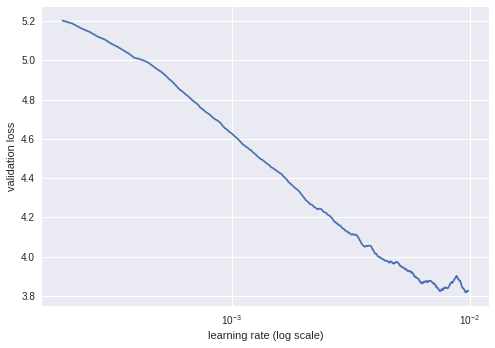

In [54]:
learner.sched.plot()

In [55]:
learner.fit(lrs, 1, wds=wd, use_clr=(20,10), cycle_len=15)

epoch      trn_loss   val_loss   accuracy   
    0      3.987739   3.927304   0.323248  
 91%|█████████ | 465/513 [03:43<00:23,  2.08it/s, loss=3.63]

    1      3.534939   3.789653   0.338761  
    2      3.273458   3.724744   0.347093  
 57%|█████▋    | 294/513 [02:24<01:47,  2.03it/s, loss=3.15]

    3      3.114349   3.70565    0.349744  
    4      2.953759   3.714017   0.350765  
 44%|████▍     | 226/513 [01:49<02:19,  2.06it/s, loss=2.88]

    5      2.847605   3.727183   0.350746  
    6      2.752987   3.746918   0.351676  
 38%|███▊      | 197/513 [01:35<02:33,  2.06it/s, loss=2.69]

    7      2.65797    3.760386   0.350953  
    8      2.657912   3.742609   0.350181  
 36%|███▋      | 186/513 [01:32<02:42,  2.01it/s, loss=2.55]

    9      2.524598   3.783914   0.352039  
    10     2.484835   3.802349   0.351602  
 35%|███▌      | 182/513 [01:29<02:42,  2.04it/s, loss=2.44]

    11     2.536594   3.773056   0.351746  
    12     2.453032   3.802576   0.35141   
 35%|███▌      | 180/513 [01:28<02:43,  2.04it/s, loss=2.37]

    13     2.388077   3.830738   0.35125   
    14     2.41046    3.832655   0.35119   



[array([3.83265]), 0.35118972516256913]

We save the trained model weights and separately save the encoder part of the LM model as well. This will serve as our backbone in the classification task model.

In [0]:
learner.save('lm5')

In [0]:
learner.save_encoder('lm5_enc')

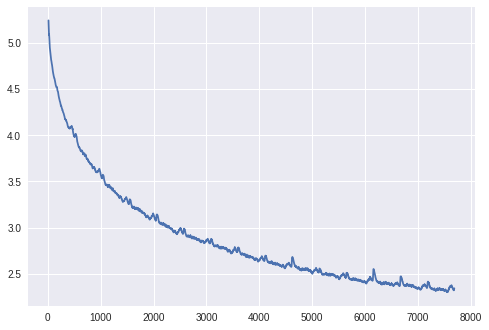

In [58]:
learner.sched.plot_loss()

# Classifier Token
The classifier model is basically a linear layer custom head on top of the LM backbone. Setting up the classifier data is similar to the LM data setup except that we cannot use the unsup movie reviews this time.

In [0]:
df_trn = pd.read_csv(CLAS_PATH/'train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv(CLAS_PATH/'test.csv', header=None, chunksize=chunksize)

In [60]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0
0


In [0]:
(CLAS_PATH/'tmp').mkdir(exist_ok=True)

np.save(CLAS_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(CLAS_PATH/'tmp'/'tok_val.npy', tok_val)

np.save(CLAS_PATH/'tmp'/'trn_labels.npy', trn_labels)
np.save(CLAS_PATH/'tmp'/'val_labels.npy', val_labels)

In [0]:
tok_trn = np.load(CLAS_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(CLAS_PATH/'tmp'/'tok_val.npy')

In [67]:
itos = pickle.load((LM_PATH/'tmp'/'itos.pkl').open('rb'))
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

18659

In [0]:
trn_clas = np.array([[stoi[o] for o in p] for p in tok_trn])
val_clas = np.array([[stoi[o] for o in p] for p in tok_val])

In [0]:
np.save(CLAS_PATH/'tmp'/'trn_ids.npy', trn_clas)
np.save(CLAS_PATH/'tmp'/'val_ids.npy', val_clas)

# Classifier
Now we can create our final model, a classifier which is really a custom linear head over our trained IMDB backbone. The steps to create the classifier model are similar to the ones for the LM.

In [0]:
trn_clas = np.load(CLAS_PATH/'tmp'/'trn_ids.npy')
val_clas = np.load(CLAS_PATH/'tmp'/'val_ids.npy')

In [0]:
trn_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'trn_labels.npy'))
val_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'val_labels.npy'))

In [0]:
bptt,em_sz,nh,nl = 70,400,1150,3
vs = len(itos)
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))
bs = 48

In [0]:
min_lbl = trn_labels.min()
trn_labels -= min_lbl
val_labels -= min_lbl
c=int(trn_labels.max())+1

In the classifier, unlike LM, we need to read a movie review at a time and learn to predict the it's sentiment as pos/neg. We do not deal with equal bptt size batches, so we have to pad the sequences to the same length in each batch. To create batches of similar sized movie reviews, we use a sortish sampler method invented by @Smerity and @jekbradbury

The sortishSampler cuts down the overall number of padding tokens the classifier ends up seeing.

In [0]:
trn_ds = TextDataset(trn_clas, trn_labels)
val_ds = TextDataset(val_clas, val_labels)
trn_samp = SortishSampler(trn_clas, key=lambda x: len(trn_clas[x]), bs=bs//2)
val_samp = SortSampler(val_clas, key=lambda x: len(val_clas[x]))
trn_dl = DataLoader(trn_ds, bs//2, transpose=True, num_workers=1, pad_idx=1, sampler=trn_samp)
val_dl = DataLoader(val_ds, bs, transpose=True, num_workers=1, pad_idx=1, sampler=val_samp)
md = ModelData(PATH, trn_dl, val_dl)

In [0]:
dps = np.array([0.4,0.5,0.05,0.3,0.4])*0.5

In [0]:
m = get_rnn_classifier(bptt, 20*70, c, vs, emb_sz=em_sz, n_hid=nh, n_layers=nl, pad_token=1,
          layers=[em_sz*3, 50, c], drops=[dps[4], 0.1],
          dropouti=dps[0], wdrop=dps[1], dropoute=dps[2], dropouth=dps[3])

In [0]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))

In [0]:
learn = RNN_Learner(md, TextModel(to_gpu(m)), opt_fn=opt_fn)
learn.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learn.clip=25.
learn.metrics = [accuracy]

In [0]:
lr=3e-3
lrm = 2.6
lrs = np.array([lr/(lrm**4), lr/(lrm**3), lr/(lrm**2), lr/lrm, lr])

In [0]:
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])

In [0]:
wd = 1e-7
wd = 0
learn.load_encoder('lm5_enc')

In [0]:
learn.freeze_to(-1)

In [83]:
learn.lr_find(lrs/1000)
learn.sched.plot()

 80%|████████  | 4/5 [06:03<01:30, 90.97s/it, loss=2.38] 

ValueError: ignored

In [84]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr=(8,3))

 80%|████████  | 4/5 [06:11<01:32, 92.83s/it, loss=1.32] 

ValueError: ignored

In [0]:
learn.save('clas_0')

In [0]:
learn.load('clas_0')

In [0]:
learn.freeze_to(-2)

In [0]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr=(8,3))

In [0]:
learn.save('clas_1')

In [0]:
learn.load('clas_1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit(lrs, 1, wds=wd, cycle_len=14, use_clr=(32,10))

In [0]:
learn.sched.plot_loss()

In [0]:
learn.save('clas_2')